In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_BTC_J7.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df.head()

,BTC_Close,BTC_Intraday,NVIDIA_Close_1,NVIDIA_Close_2,NVIDIA_Close_3,NVIDIA_Close_4,NVIDIA_Close_5,NVIDIA_Close_6,NVIDIA_Close_7,AMD_Close_1,AMD_Close_2,AMD_Close_3,AMD_Close_4,AMD_Close_5,AMD_Close_6,AMD_Close_7,GOOGLE_Close_1,GOOGLE_Close_2,GOOGLE_Close_3,GOOGLE_Close_4,GOOGLE_Close_5,GOOGLE_Close_6,GOOGLE_Close_7,GPS_Close_1,GPS_Close_2,GPS_Close_3,GPS_Close_4,GPS_Close_5,GPS_Close_6,GPS_Close_7,IBM_Close_1,IBM_Close_2,IBM_Close_3,IBM_Close_4,IBM_Close_5,IBM_Close_6,IBM_Close_7,GOLD_USD_PM_1,GOLD_USD_PM_2,GOLD_USD_PM_3,...,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,CNYUSD_Close_1,CNYUSD_Close_2,CNYUSD_Close_3,CNYUSD_Close_4,CNYUSD_Close_5,CNYUSD_Close_6,CNYUSD_Close_7,GBPUSD_Close_1,GBPUSD_Close_2,GBPUSD_Close_3,GBPUSD_Close_4,GBPUSD_Close_5,GBPUSD_Close_6,GBPUSD_Close_7,IBB_Close_1,IBB_Close_2,IBB_Close_3,IBB_Close_4,IBB_Close_5,IBB_Close_6,IBB_Close_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,IEF_Close_1,IEF_Close_2,IEF_Close_3,IEF_Close_4,IEF_Close_5,IEF_Close_6,IEF_Close_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,-0.024739,0.042715,-0.007835,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,-0.006344,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.006101,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.017741,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.005158,0.000000,-0.009405,-0.007059,0.012282,0.000000,0.000000,0.003436,0.000688,-0.000687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.007813,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,0.000000,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000
2019-11-29,0.039930,0.043029,0.000000,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,0.000000,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,0.000000,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,0.000000,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,0.000000,-0.009405,-0.007059,0.012282,0.000000,0.000000,0.004111,0.000688,-0.000687,-0.002331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.000000,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,0.000000,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179
2019-11-28,-0.009029,0.037027,0.005714,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.010772,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.000426,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.005879,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.009405,-0.007059,0.012282,0.000000,0.000000,0.004111,0.004429,-0.000687,-0.002331,-0.003825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007681,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,-0.011217,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,-0.002590,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500
2019-11-27,0.043364,0.092486,-0.019032,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020106,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.005250,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.009434,-0.008741,0.013585,0.000000,0.000000,0.044417,-0.004300,-0.029219,-0.007059,0.012282,0.000000,0.000000,0.004111,0.004429,-0.009518,-0.002331,-0.003825,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001945,0.024608,0.000000,0.000000,0.009711,0.002984,0.004495,0.002015,0.005866,0.000000,0.000000,-0.001278,-0.006140,0.005001,0.001879,0.000448,0.000000,0.000000,-0.000179,-0.002500,0.003674
2019-11-26,0.010076,0.031276,0.048935,0.000000,0.000000,0.003378,-0.004735,0.015337,-0.020209,0.016347,0.000000,0.000000,-0.009362,-0.035627,-0.007508,0.035356,0.008762,0.000000,0.000000,-0.004618,-0.001305,-0.00

In [4]:
columns = df.columns
columns

Index(['BTC_Close', 'BTC_Intraday', 'NVIDIA_Close_1', 'NVIDIA_Close_2',
       'NVIDIA_Close_3', 'NVIDIA_Close_4', 'NVIDIA_Close_5', 'NVIDIA_Close_6',
       'NVIDIA_Close_7', 'AMD_Close_1',
       ...
       'ICE_Close_5', 'ICE_Close_6', 'ICE_Close_7', 'IEF_Close_1',
       'IEF_Close_2', 'IEF_Close_3', 'IEF_Close_4', 'IEF_Close_5',
       'IEF_Close_6', 'IEF_Close_7'],
      dtype='object', length=107)

In [16]:
BTC = ['BTC_Close', 'BTC_Intraday']
sub_col = []
i = 0
for col in columns:
  i += 1
  if i > 2 and i < 24:
    BTC.append(col)
print(BTC)

['BTC_Close', 'BTC_Intraday', 'NVIDIA_Close_1', 'NVIDIA_Close_2', 'NVIDIA_Close_3', 'NVIDIA_Close_4', 'NVIDIA_Close_5', 'NVIDIA_Close_6', 'NVIDIA_Close_7', 'AMD_Close_1', 'AMD_Close_2', 'AMD_Close_3', 'AMD_Close_4', 'AMD_Close_5', 'AMD_Close_6', 'AMD_Close_7', 'GOOGLE_Close_1', 'GOOGLE_Close_2', 'GOOGLE_Close_3', 'GOOGLE_Close_4', 'GOOGLE_Close_5', 'GOOGLE_Close_6', 'GOOGLE_Close_7']


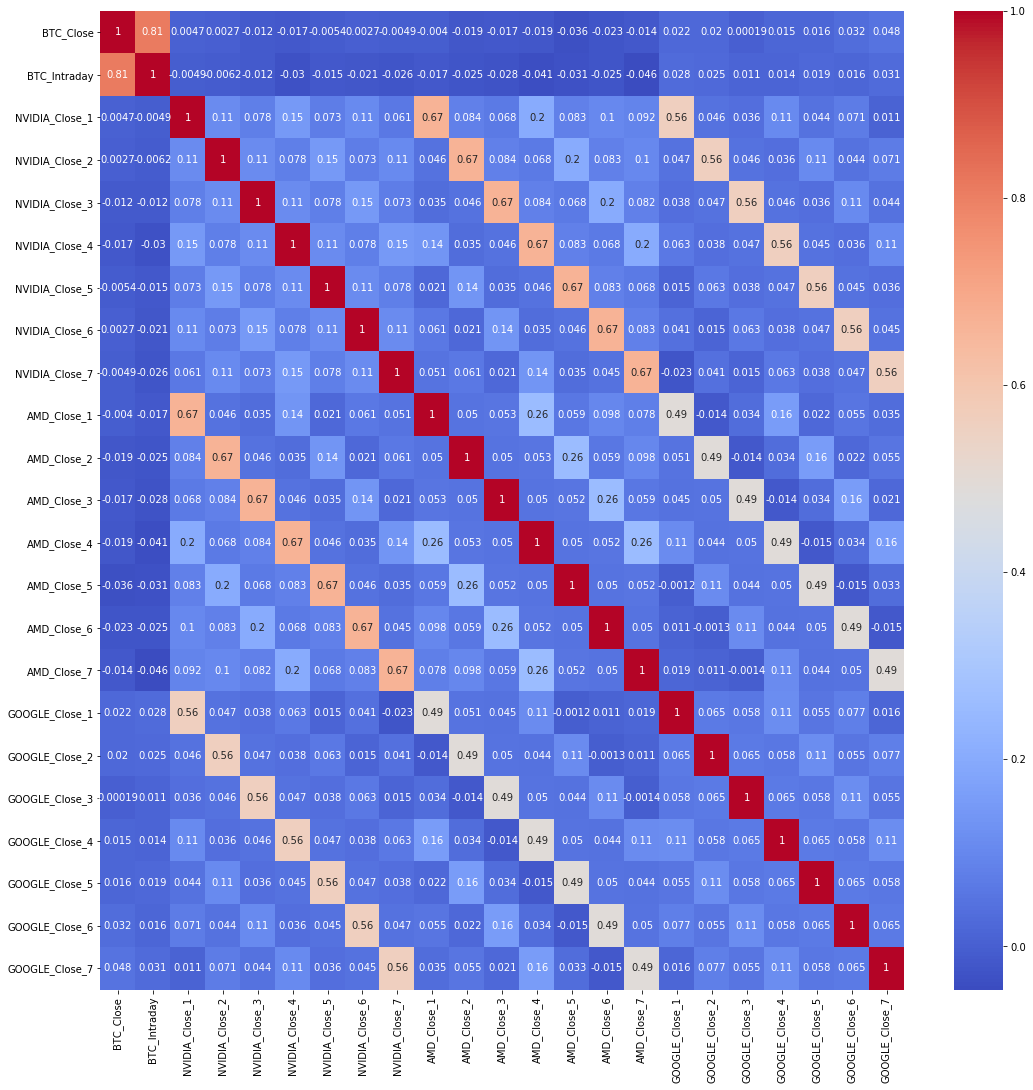

In [21]:
cor = np.absolute(df[BTC]).corr()

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cor, annot= True, ax= ax, cmap="coolwarm")

In [88]:
df_1 = df.fillna(0)
# df_1 = df
data = df_1.iloc[:, 1:]
target = df_1['BTC_Close']
X_train = data[500:]
X_test = data[:500]
y_train = target[500:]
y_test = target[:500]
print(len(df_1))
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

2530


In [89]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas = [0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100])
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 7.e-01, 1.e+00, 1.e+01, 5.e+01,
       1.e+02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [90]:
from sklearn.metrics import mean_squared_error
ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)
print(mean_squared_error(y_train, ridge_pred_train))
print(mean_squared_error(y_test, ridge_pred_test))

0.0018758883235416805
0.0012814574870926947


In [93]:
zeros = np.zeros(2030) - 0.2
zeros.shape

(2030,)

In [0]:
df_BTC_Reel = df_1.BTC_Close
df_predict = pd.DataFrame(np.concatenate((ridge_pred_test, zeros), axis = 0),
                          index=df_1.index, 
                          columns=['Prediction_BTC'])


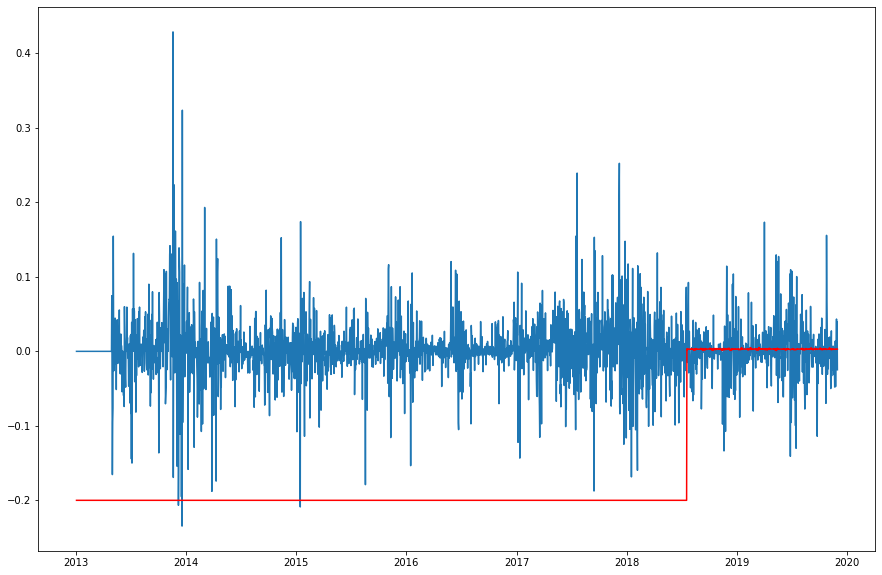

In [95]:
plt.figure(figsize=(15, 10))
plt.plot(df_BTC_Reel)
plt.plot(df_BTC_Reel.index, df_predict['Prediction_BTC'], color='r')
plt.show()

In [0]:
sum_reel = []
sum_reel.append(df_BTC_Reel[0])
for i in range(len(df_BTC_Reel)-1):
  sum_reel.append(sum_reel[i] * (1 + df_BTC_Reel[i+1]))


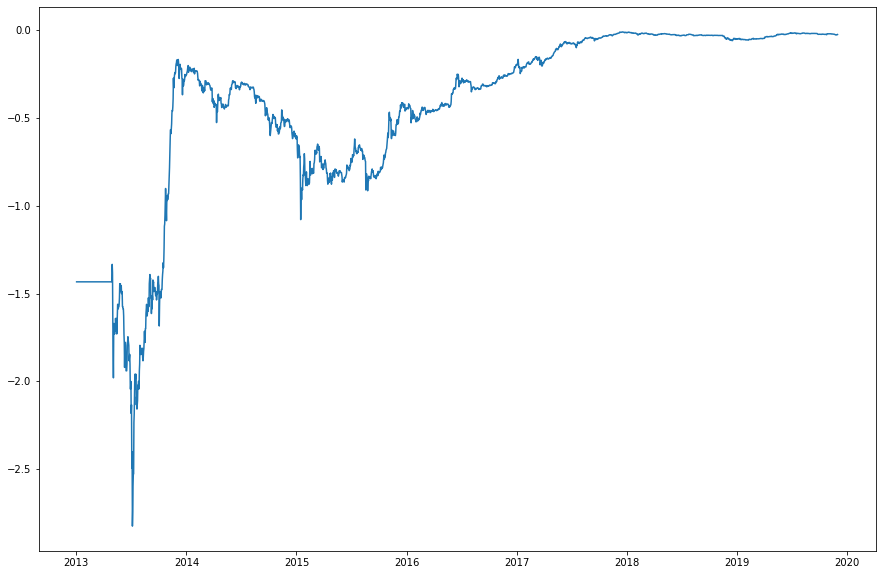

In [99]:
plt.figure(figsize=(15, 10))
plt.plot(df_BTC_Reel.index, sum_reel)
plt.show()